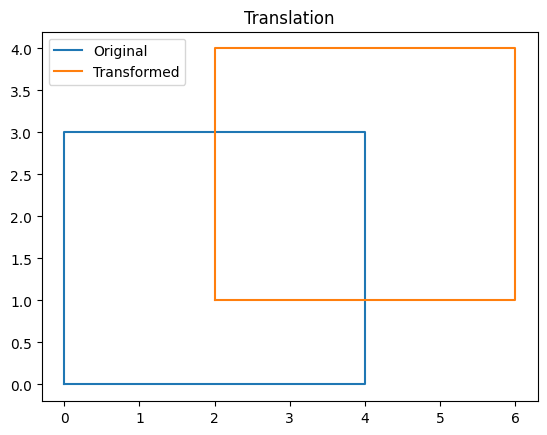

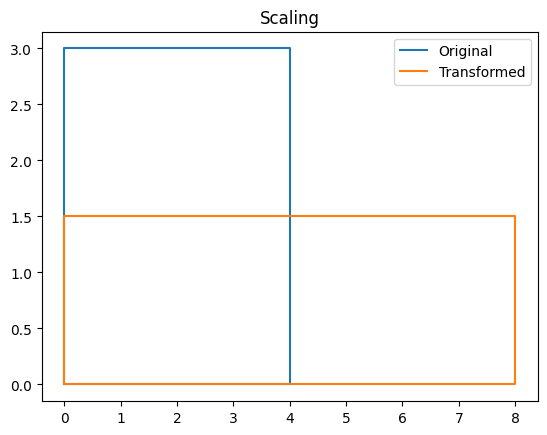

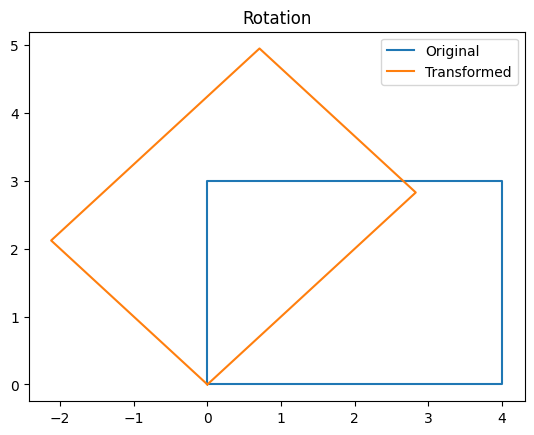

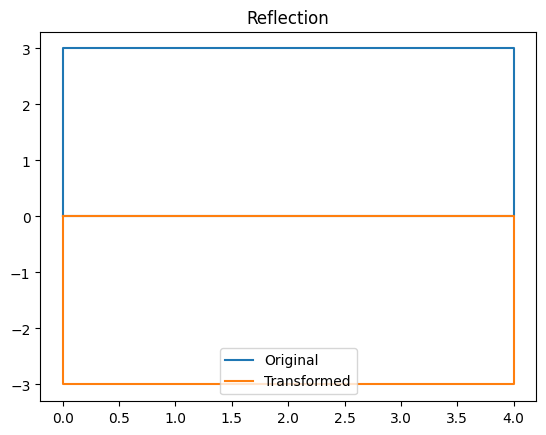

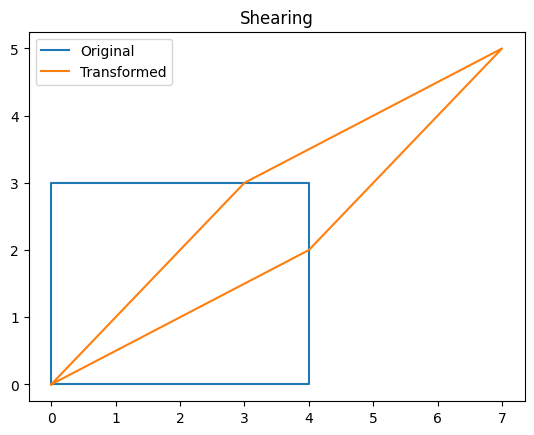

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object as a list of points
rectangle = np.array([[0, 0], [4, 0], [4, 3], [0, 3]])

# Function to apply transformations
def apply_transformation(points, matrix):
    ones = np.ones((points.shape[0], 1))  # Add a column of ones for homogeneous coordinates
    homogenous_points = np.hstack([points, ones])
    transformed_points = homogenous_points @ matrix.T
    return transformed_points[:, :2]

# Translation
def translate(points, tx, ty):
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

# Scaling
def scale(points, sx, sy):
    transformation_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

# Rotation
def rotate(points, angle):
    rad = np.radians(angle)
    transformation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

# Reflection
def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    return apply_transformation(points, transformation_matrix)

# Shearing
def shear(points, shx, shy):
    transformation_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(points, transformation_matrix)

# Visualization
def plot_object(original, transformed, title):
    plt.figure()
    plt.plot(*zip(*original, original[0]), label="Original")
    plt.plot(*zip(*transformed, transformed[0]), label="Transformed")
    plt.legend()
    plt.title(title)
    plt.show()

# Apply transformations and visualize
translated = translate(rectangle, 2, 1)
scaled = scale(rectangle, 2, 0.5)
rotated = rotate(rectangle, 45)
reflected = reflect(rectangle, 'x')
sheared = shear(rectangle, 1, 0.5)

plot_object(rectangle, translated, "Translation")
plot_object(rectangle, scaled, "Scaling")
plot_object(rectangle, rotated, "Rotation")
plot_object(rectangle, reflected, "Reflection")
plot_object(rectangle, sheared, "Shearing")


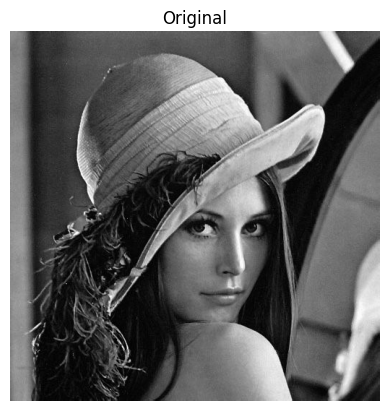

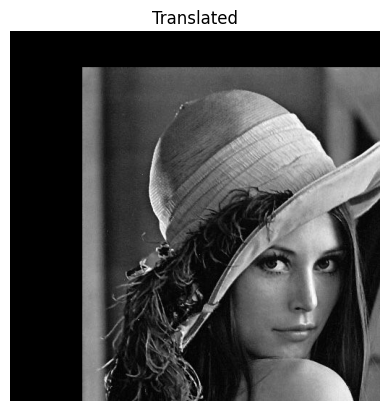

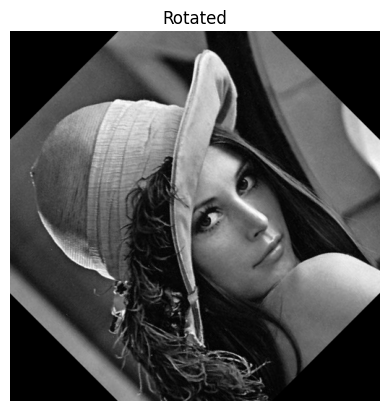

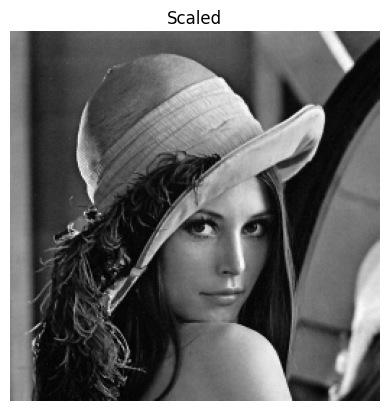

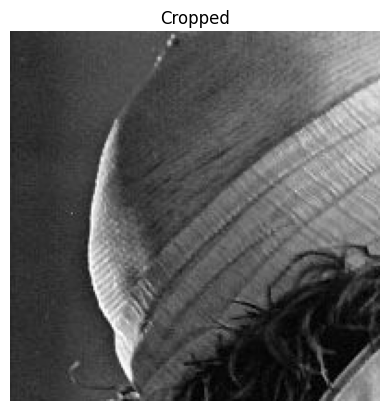

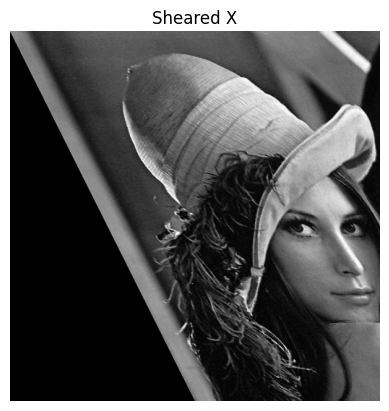

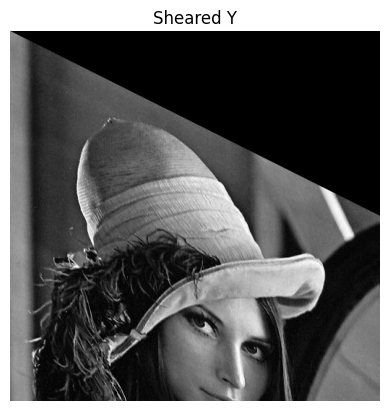

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/sample_data/Picturemain.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Display helper function
def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (cols, rows))

# Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    return cv2.warpAffine(img, M, (cols, rows))

# Scaling
def scale_image(img, fx, fy):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Cropping
def crop_image(img, start_x, start_y, width, height):
    return img[start_y:start_y + height, start_x:start_x + width]

# Shearing
def shear_image_x(img, shx):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shx, 0], [0, 1, 0]])
    return cv2.warpAffine(img, M, (cols, rows))

def shear_image_y(img, shy):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shy, 1, 0]])
    return cv2.warpAffine(img, M, (cols, rows))

# Transformations
translated = translate_image(image, 100, 50)
rotated = rotate_image(image, 45)
scaled = scale_image(image, 0.5, 0.5)
cropped = crop_image(image, 50, 50, 200, 200)
sheared_x = shear_image_x(image, 0.5)
sheared_y = shear_image_y(image, 0.5)

# Display images
display_image("Original", image)
display_image("Translated", translated)
display_image("Rotated", rotated)
display_image("Scaled", scaled)
display_image("Cropped", cropped)
display_image("Sheared X", sheared_x)
display_image("Sheared Y", sheared_y)
